<a href="https://colab.research.google.com/github/tg-bomze/Style-Transfer-Collection/blob/master/(Photo)_neural_style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><font color="black" size="+4">neural-style</font></b>

<b><font color="black" size="+2">Based on:</font></b>

**GitHub repository**: [neural-style](https://github.com/anishathalye/neural-style)

Article: [A Neural Algorithm of Artistic Style](https://arxiv.org/pdf/1508.06576v2.pdf)

Creator: **[Anish Athalye](https://github.com/anishathalye).**

<b><font color="black" size="+2">Colab created by:</font></b>

GitHub: [@tg-bomze](https://github.com/tg-bomze),
Telegram: [@bomze](https://t.me/bomze),
Twitter: [@tg_bomze](https://twitter.com/tg_bomze).

---


```
(ENG) To get started, click on the button (where the red arrow indicates). After clicking, wait until the execution is complete.
```
```
(RUS) Чтобы начать, нажмите на кнопку (куда указывает красная стрелка), после чего дождитесь завершения выполнения блока.
```


In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Install all necessary components</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Установить все необходимые компоненты</font></b>

import os
import io
import cv2
from PIL import Image
import imageio
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output
from IPython.display import HTML
%matplotlib inline

!git clone https://github.com/anishathalye/neural-style.git
%cd /content/neural-style
!pip install -r requirements.txt
!wget https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat
%tensorflow_version 1.x

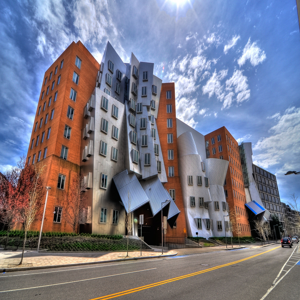

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Upload content image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Загрузить основное фото</font></b>

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
os.rename(fn, fn.replace(" ", ""))
fn = fn.replace(" ", "")
content_img = "content." + fn.split(".")[-1]
!mv -f $fn $content_img

im = Image.open(content_img)
(width, height) = im.size
content_img_max = max(width, height)
content_img_min = min(width, height)

display(Image.open(content_img).resize((300, 300)))

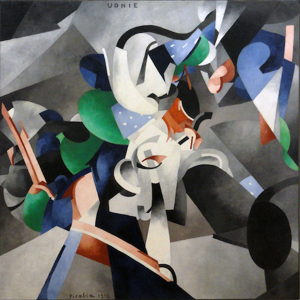

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Upload style image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Загрузить фото со стилем</font></b>

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
os.rename(fn, fn.replace(" ", ""))
fn = fn.replace(" ", "")
style_img = "style." + fn.split(".")[-1]
!mv -f $fn $style_img

im = Image.open(style_img)
(width, height) = im.size
style_img_max = max(width, height)
style_img_min = min(width, height)

display(Image.open(style_img).resize((300, 300)))

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Style Transfer</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Перенести стиль из фото на видео</font></b>
%%time

!rm -rf /content/neural-style/result.jpg
ITERATIONS = 1000 #@param {type:"slider", min:500, max:3000, step:100}
#@markdown ---
CONTENT_WEIGHT = 5e0 #@param {type:"slider", min:1, max:100, step:5}
CONTENT_WEIGHT_BLEND = 1 #@param {type:"slider", min:0, max:1, step:0.025}
STYLE_WEIGHT = 5e2 #@param {type:"slider", min:1, max:500, step:10}
LEARNING_RATE = 1e1 #@param {type:"slider", min:1, max:10, step:1}
STYLE_SCALE = 1.0 #@param {type:"slider", min:0, max:1, step:0.025}
POOLING = 'max' #@param ["max", "avg"]

result_img = "/content/neural-style/result.jpg"
!python neural_style.py --content $content_img --styles $style_img --output $result_img --content-weight $CONTENT_WEIGHT --content-weight-blend $CONTENT_WEIGHT_BLEND --style-weight $STYLE_WEIGHT --learning-rate $LEARNING_RATE --style-scales $STYLE_SCALE --pooling $POOLING --iterations $ITERATIONS

CPU times: user 1.14 s, sys: 236 ms, total: 1.37 s
Wall time: 5min 38s


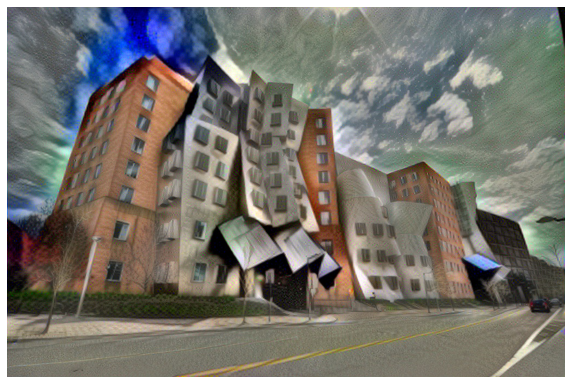

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Open the final image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Открыть итоговый результат</font></b>
fig = plt.figure(figsize=(10, 10))
img = plt.imread(result_img)
plt.axis('off')
plt.imshow(img)

In [ ]:
#@title <b><font color="red" size="+3">←</font><font color="black" size="+3"> Download the final image</font></b>
#@markdown <b><font color="black" size="+1"> (RUS) Скачать итоговый результат</font></b>
files.download(result_img)